### Sentiment Analysis

#### Overview
In this project, we will perform a sentiment analysis about the use of ChatGPT software based on the comments extracted from Reddit. We will be using the dataset from Kaggle containing information such as the comment ID, comment parent ID, comment, and the subreddit.

#### Objectives
* Clean the dataset if needed.
* Explore data.
* Perform sentimental analysis to get insight.

Source: https://www.kaggle.com/datasets/armitaraz/chatgpt-reddit

#### Data Preparation

In [54]:
#import libraries
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [55]:
#load dataset
df = pd.read_csv("data/chatgpt-reddit-comments.csv")
df.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
0,0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


In [56]:
df.describe()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
count,52413,52415,52415,52415,52415
unique,29712,52413,22596,51042,5
top,0,comment_id,t3_107vs7i,[deleted],r/ChatGPT
freq,4,3,239,661,29711


In [57]:
df.dtypes

Unnamed: 0           object
comment_id           object
comment_parent_id    object
comment_body         object
subreddit            object
dtype: object

#### Data Cleaning

In [58]:
#drop first columns since it is just the index
df.drop(df.columns[0], axis=1, inplace=True)

In [59]:
#change names to a better variables
df.rename(
    columns = {"comment_id": "id",
               "comment_parent_id": "parent_id",
               "comment_body": "comment",},
    inplace=True
)

df.head()

,id,parent_id,comment,subreddit
0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


In [60]:
#count word length
df["word_length"] = df['comment'].apply(lambda x: len(str(x).split(" ")))

In [61]:
#remove comments having word length less than 5
df.drop(df[df["word_length"]<5].index, inplace=True)
df.shape

(46563, 5)

In [62]:
#extract only words in the comment
df["comment"] = df['comment'].apply(lambda x: " ".join((word for word in re.findall(r'\b\w+\b', str(x)) if len(word) > 2)))
df["comment"] = df["comment"].str.lower()
df.head()


,id,parent_id,comment,subreddit,word_length
0,iztdxuh,t3_zj2aeu,been shocked for days now don need clickbait,r/ChatGPT,10
1,iztn0q0,t3_zj2aeu,angry right now just wasted time reading post ...,r/ChatGPT,229
2,izudrph,t3_zj2aeu,chatgpt karma whoring here folks just when you...,r/ChatGPT,23
4,izu2as9,t3_zj2aeu,certified must see moment really did shock core,r/ChatGPT,12
5,izw8iw3,t3_zj2aeu,wow way discover the most basic functionality ...,r/ChatGPT,23


#### Specifying Sentiment Polarity

In [63]:
df['sentiment'] = df['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,id,parent_id,comment,subreddit,word_length,sentiment
0,iztdxuh,t3_zj2aeu,been shocked for days now don need clickbait,r/ChatGPT,10,-0.700000
1,iztn0q0,t3_zj2aeu,angry right now just wasted time reading post ...,r/ChatGPT,229,-0.032143
2,izudrph,t3_zj2aeu,chatgpt karma whoring here folks just when you...,r/ChatGPT,23,0.400000
4,izu2as9,t3_zj2aeu,certified must see moment really did shock core,r/ChatGPT,12,0.200000
5,izw8iw3,t3_zj2aeu,wow way discover the most basic functionality ...,r/ChatGPT,23,0.200000


In [64]:
# label the sentiment score
def label(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [65]:
df["sentiment"] = df["sentiment"].apply(label)
df.head()

,id,parent_id,comment,subreddit,word_length,sentiment
0,iztdxuh,t3_zj2aeu,been shocked for days now don need clickbait,r/ChatGPT,10,Negative
1,iztn0q0,t3_zj2aeu,angry right now just wasted time reading post ...,r/ChatGPT,229,Negative
2,izudrph,t3_zj2aeu,chatgpt karma whoring here folks just when you...,r/ChatGPT,23,Positive
4,izu2as9,t3_zj2aeu,certified must see moment really did shock core,r/ChatGPT,12,Positive
5,izw8iw3,t3_zj2aeu,wow way discover the most basic functionality ...,r/ChatGPT,23,Positive


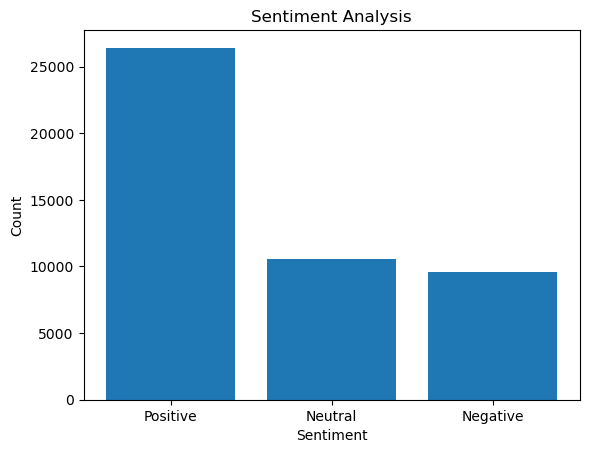

In [66]:
plt.bar(df["sentiment"].value_counts().index, df["sentiment"].value_counts())
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

#### Frequent  Words Used

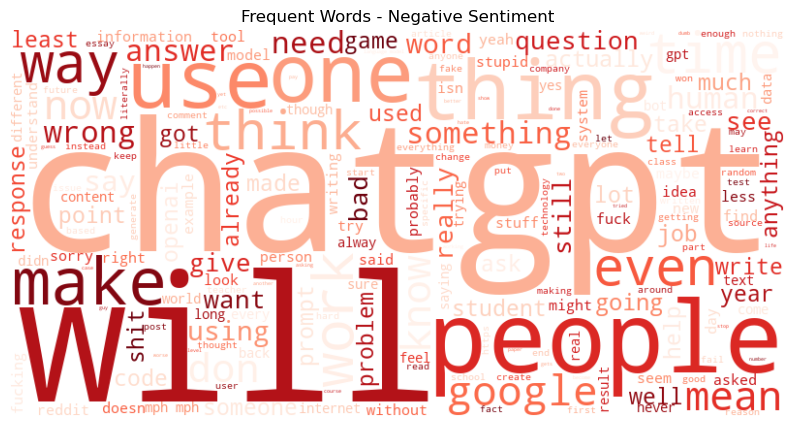

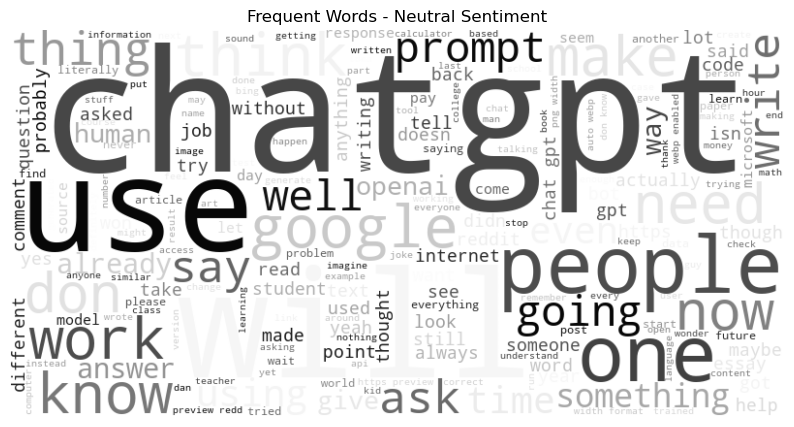

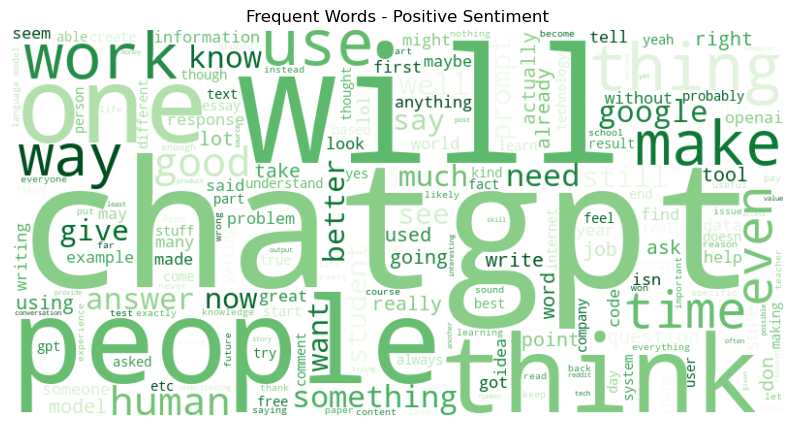

In [67]:
sentiments = ['Negative', 'Neutral', 'Positive']
colors = ['Reds', 'Greys', 'Greens']

for sentiment, color in zip(sentiments, colors):
    filtered_comments = ' '.join(df[df['sentiment'] == sentiment]['comment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(filtered_comments)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Frequent Words - {sentiment} Sentiment')
    plt.show()

#### Evaluation
* We cleaned the dataset by removing unused columns, and changing the variable names to a simpler one.
* We removed comments that has a word length less than 5.
* We cleaned the comments by only extracting the words and remove words containing 2 letters.
* Since the result after cleaning is in a list format, we use join() with a space separator and transform the words to lowercase().
* Using the TextBlob() function, we calculated the sentiment polarity of the comments.
* We then creates labels of negative, neutral, and positive with a function. The comment is negative if the polarity score is less than 0, neutral if it is 0, and positive if it is greater than 0.
* In the plot, we can see that the opinion of the users about ChatGPT is mostly positive.
* In the last part, I visualize the frequent words for each sentiment with a word cloud.